In [1]:
import pytz
import pandas as pd
from datetime import timedelta, datetime
import matplotlib.pyplot as plt

In [5]:
req_df = pd.read_pickle("../output/femux_v3_mc/req_df_with_cold_or_warm.pickle")

# I want to group by APP_NAME such that I see the total number of requests which are cold and warm and ignore NaN values
# If the value is NaN, tag it to 'c'
total_apps = req_df['APP_NAME'].unique()
req_df['COLD_OR_WARM'] = req_df['COLD_OR_WARM'].fillna("c")
req_df = req_df[req_df['COLD_OR_WARM'] == "c"]

fil_df = req_df.groupby('APP_NAME')['COLD_OR_WARM'].value_counts()
fil_df = fil_df.reset_index(name='COUNT')
fil_df = fil_df[['APP_NAME', 'COUNT']]
fil_df
# fil_df.to_pickle("../output/vanilla_per_app_cold_starts.pickle")

,APP_NAME,COUNT
0,application-b436299d,262
1,application-b49bdf98,3
2,application-b4e9f8a6,605
3,application-b529a846,3
4,application-b58fc0a0,77
5,application-b5a2e82a,1
6,application-b6d12f44,1
7,application-b736ea9a,6
8,application-b8e62c1f,259
9,application-bbb6e44d,20


In [10]:
qp_df = pd.read_pickle("../output/femux_v3_mc/qp_df.pickle")

# # # remove all rows where the request start time is > 04-06 18
# # # qp_df["IngressStartTime"] = pd.to_datetime(qp_df["IngressStartTime"])
# # qp_df["QPStartTime"] = pd.to_datetime(qp_df["QPStartTime"])
# # # qp_df = qp_df[qp_df["IngressStartTime"] < datetime.strptime("2024-04-06 18:00:00.000", "%Y-%m-%d %H:%M:%S.%f").replace(tzinfo=pytz.UTC)]
# # qp_df = qp_df[qp_df["QPStartTime"] < datetime.strptime("18:00:00.000", "%Y-%m-%d %H:%M:%S.%f")]
# some_df = qp_df["QPStartTime"].apply(lambda x: len(str(x).split(" ")))
# get all rows were none of the elements are not nAn
qp_df = qp_df.dropna()
len(set(qp_df["APP_NAME"].values))

100

In [20]:
pod_df = pd.read_pickle("../output/femux_v3_mc/pod_name_start_and_end_df.pickle")
pod_df
# cutoff_time = 30
# pod_df = pod_df[(pod_df["POD_START_TIME"] > pod_df["POD_START_TIME"].iloc[0] + timedelta(minutes=cutoff_time)) & (pod_df["POD_END_TIME"] < pod_df["POD_START_TIME"].iloc[-1] - timedelta(minutes=5*cutoff_time))]

,POD_NAME,POD_START_TIME,POD_END_TIME,POD_DURATION
0,application-e3327d8e-world-deployment-5f6f6978...,2024-04-11 03:48:36,NaT,-1.000
1,application-b3c0382a-world-deployment-5594f776...,2024-04-11 03:48:38,NaT,-1.000
2,application-ffd7cf63-world-deployment-59b468f9...,2024-04-11 03:48:40,NaT,-1.000
3,application-db200d5d-world-deployment-6cfc5cb7...,2024-04-11 03:48:42,NaT,-1.000
4,application-e249fc46-world-deployment-cbc559c4...,2024-04-11 03:48:45,NaT,-1.000
...,...,...,...,...
14715,application-b58fc0a0-world-deployment-6bd6cbc4...,2024-04-12 03:54:50,2024-04-12 03:55:45.336221,55336.221
14716,application-d1001181-world-deployment-8449ddcb...,2024-04-12 03:55:08,2024-04-12 03:56:09.739142,61739.142
14717,application-dffe41c8-world-deployment-6885f7fc...,2024-04-12 03:55:08,2024-04-12 03:56:11.343177,63343.177
14718,application-b8e62c1f-world-deployment-76699dbd...,2024-04-12 03:55:09,2024-04-12 03:56:09.136160,60136.160


In [21]:
len(set(pod_df["POD_NAME"].apply(lambda x: x[:20]).values))

100

In [17]:
problematic_pod_df = pod_df[(pod_df["POD_END_TIME"] >= datetime.strptime("2024-04-08 15:00:00.000", "%Y-%m-%d %H:%M:%S.%f")) & (pod_df["POD_START_TIME"] < datetime.strptime("2024-04-08 16:00:00.000", "%Y-%m-%d %H:%M:%S.%f"))]

In [21]:
filtered_pod_df = problematic_pod_df[(problematic_pod_df["POD_DURATION"] > 10*60*1000) & (problematic_pod_df["POD_END_TIME"] < datetime.strptime("2024-04-08 15:14:00.000", "%Y-%m-%d %H:%M:%S.%f"))]


In [27]:
filtered_pod_df.head(1)["POD_NAME"].values

array(['application-fbe4c9a2-world-deployment-67dc5456bf-cd2hs'],
      dtype=object)

In [4]:
# # get all rows where REQUEST_START_TIME is > 2024-04-02 02:53:08 and < 2024-04-02 02:54:08 
# # range_df = req_df[(req_df["REQUEST_START_TIME"] > "2024-04-02 02:54:08") & (req_df["REQUEST_START_TIME"] < "2024-04-02 02:55:08")]
# req_df.dropna(subset=["REQUEST_START_TIME", "REQUEST_DURATION"])
req_df

,REQUEST_ID,APP_NAME,POD_NAME,NODE_NAME,REQUEST_START_TIME,REQUEST_DURATION,REQUEST_RESPONSE_TYPE
0,c2c50186-51fa-47e4-a27d-ed0019ee0afd,application-de55b3c0,application-de55b3c0-world-deployment-6c78db96...,node5,2024-04-06 00:58:01.620,188956.0,SUCCESS
1,4e896c1c-f148-465d-ac86-e5240b509685,application-f51819aa,application-f51819aa-world-deployment-7ffbdbf9...,node5,2024-04-06 00:58:01.645,249092.0,SUCCESS
2,da721a66-baf2-4f6f-96aa-8d5364550390,application-f9fa0095,application-f9fa0095-world-deployment-fb49bd65...,node7,2024-04-06 01:00:01.604,32825.0,FAILED
3,9929a0be-a65e-4403-ae10-3efef0055c17,application-ebd0c315,None,None,2024-04-06 01:00:39.717,NaN,SUCCESS
4,6454cd99-4f83-4340-a86c-40611cd0fb0a,application-bb3c1186,None,None,2024-04-06 01:00:40.471,NaN,SUCCESS
...,...,...,...,...,...,...,...
360673,01c43db0-c399-4533-9656-3850625494dc,application-dd734865,None,None,2024-04-06 21:03:20.056,NaN,SUCCESS
360674,72102d94-d577-4986-98ff-09e178cd4b57,application-d46861db,None,None,2024-04-06 21:03:20.148,NaN,SUCCESS
360675,608ec1e6-36c6-4e58-af95-93a8e93f8ccc,application-d46861db,None,None,2024-04-06 21:03:20.429,NaN,SUCCESS
360676,ac7b06b3-35d2-4720-826b-180cac254d8c,application-dd734865,None,None,2024-04-06 21:03:20.436,NaN,SUCCESS


In [52]:
req_df = pd.read_pickle("../output/femux_v3_mc/request_id_start_and_end_df.pickle")
req_df[req_df["REQUEST_ID"] == "dba16040-697a-426d-b1bb-ea31f5508100"]

,REQUEST_ID,APP_NAME,POD_NAME,NODE_NAME,REQUEST_START_TIME,REQUEST_DURATION,REQUEST_RESPONSE_TYPE
4519,dba16040-697a-426d-b1bb-ea31f5508100,application-b58fc0a0,application-b58fc0a0-world-deployment-7948dd9b...,node9,2024-04-03 02:47:27.056,1907.0,SUCCESS


In [63]:
def get_ideal_average_concurrency(df):
    # counter to maintain the concurrency across timestamps
    concurrency = 0
    # all start times of invocations
    all_start_inv_times = []
    # all end times of invocations
    all_end_inv_times = []
    # [(st1, 's'), (st2, 's'), (et1, 'e'), ...]
    curr_inv_queue = []
    # this is going to be returned and contains arrival time to ideal average concurrency mappings
    map_at_to_ideal_avg_conc = {}

    # get all start and end times for invocations in 2 lists
    for _, row in df.iterrows():
        all_start_inv_times.append(row.REQUEST_START_TIME)
        all_end_inv_times.append(row.REQUEST_END_TIME)

    for start_times, end_times in zip(all_start_inv_times, all_end_inv_times):
        curr_inv_queue.append((start_times, "s"))
        curr_inv_queue.append((end_times, "e"))

    # sort the list so that all start and end times in the range are together and in cronological order
    curr_inv_queue.sort(key=lambda x: x[0])

    # keep popping the first elements so that we know wether to increase the concurrency of decrease it
    while len(curr_inv_queue) != 0:
        curr_elem = curr_inv_queue.pop(0)
        if curr_elem[1] == "s":
            concurrency += 1
        elif curr_elem[1] == "e":
            concurrency -= 1
        if curr_elem[0] not in map_at_to_ideal_avg_conc:
            map_at_to_ideal_avg_conc[curr_elem[0]] = (concurrency, curr_elem[1])
        elif map_at_to_ideal_avg_conc[curr_elem[0]][1] == 's' and curr_elem[1] == 'e':
            del map_at_to_ideal_avg_conc[curr_elem[0]]
        else:
            map_at_to_ideal_avg_conc[curr_elem[0]] = (concurrency, curr_elem[1])
        # print("curr timestamp ", curr_elem)
    map_at_to_ideal_avg_conc = dict(sorted(map_at_to_ideal_avg_conc.items(), key=lambda item: item[0]))
    return map_at_to_ideal_avg_conc

In [81]:
def get_end_time(request_start_time, request_duration):
    # TODO: why is the duration negative sometimes
    return request_start_time + timedelta(milliseconds=max(0, float(request_duration)))
req_df["REQUEST_END_TIME"] = req_df.apply(lambda x: get_end_time(x.REQUEST_START_TIME, x.REQUEST_DURATION), axis=1)
map_at_to_ideal_avg_conc = get_ideal_average_concurrency(req_df)

In [83]:
map_at_to_ideal_avg_conc
# if map_at_to_ideal_avg_conc[i][1] == 's' then change the key to the floor minute
# if map_at_to_ideal_avg_conc[i][1] == 'e' then change the key to the ceil minute
# then create a new dict with the above keys and values as the values of the new dict
# then plot the graph
new_dict = {}
for key, value in map_at_to_ideal_avg_conc.items():
    if value[1] == 's':
        new_dict[key.replace(second=0, microsecond=0)] = value[0]
    elif value[1] == 'e':
        new_dict[key.replace(second=0, microsecond=0) + timedelta(minutes=1)] = value[0]

# sort the new_dict
new_dict = dict(sorted(new_dict.items(), key=lambda item: item[0]))
new_dict

{Timestamp('2024-04-03 02:16:00'): 6,
 Timestamp('2024-04-03 02:17:00'): 4,
 Timestamp('2024-04-03 02:18:00'): 4,
 Timestamp('2024-04-03 02:19:00'): 3,
 Timestamp('2024-04-03 02:20:00'): 4,
 Timestamp('2024-04-03 02:21:00'): 3,
 Timestamp('2024-04-03 02:22:00'): 2,
 Timestamp('2024-04-03 02:23:00'): 4,
 Timestamp('2024-04-03 02:24:00'): 2,
 Timestamp('2024-04-03 02:25:00'): 7,
 Timestamp('2024-04-03 02:26:00'): 4,
 Timestamp('2024-04-03 02:27:00'): 2,
 Timestamp('2024-04-03 02:28:00'): 2,
 Timestamp('2024-04-03 02:29:00'): 4,
 Timestamp('2024-04-03 02:30:00'): 6,
 Timestamp('2024-04-03 02:31:00'): 3,
 Timestamp('2024-04-03 02:32:00'): 4,
 Timestamp('2024-04-03 02:33:00'): 3,
 Timestamp('2024-04-03 02:34:00'): 4,
 Timestamp('2024-04-03 02:35:00'): 4,
 Timestamp('2024-04-03 02:36:00'): 2,
 Timestamp('2024-04-03 02:37:00'): 4,
 Timestamp('2024-04-03 02:38:00'): 3,
 Timestamp('2024-04-03 02:39:00'): 3,
 Timestamp('2024-04-03 02:40:00'): 3,
 Timestamp('2024-04-03 02:41:00'): 5,
 Timestamp('

2024-04-03 02:16:00 (1, 's')
2024-04-03 02:16:00 (2, 's')
2024-04-03 02:16:00 (3, 's')
2024-04-03 02:16:00 (4, 's')
2024-04-03 02:16:00 (5, 's')
2024-04-03 02:16:00 (4, 'e')
2024-04-03 02:16:00 (3, 'e')
2024-04-03 02:16:00 (4, 's')
2024-04-03 02:16:00 (5, 's')
2024-04-03 02:16:00 (6, 's')
2024-04-03 02:16:00 (7, 's')
2024-04-03 02:16:00 (8, 's')
2024-04-03 02:16:00 (10, 's')
2024-04-03 02:16:00 (11, 's')
2024-04-03 02:16:00 (10, 'e')
2024-04-03 02:16:00 (11, 's')
2024-04-03 02:16:00 (12, 's')
2024-04-03 02:16:00 (13, 's')
2024-04-03 02:16:00 (14, 's')
2024-04-03 02:16:00 (15, 's')
2024-04-03 02:16:00 (16, 's')
2024-04-03 02:16:00 (17, 's')
2024-04-03 02:16:00 (18, 's')
2024-04-03 02:16:00 (17, 'e')
2024-04-03 02:16:00 (16, 'e')
2024-04-03 02:16:00 (15, 'e')
2024-04-03 02:16:00 (16, 's')
2024-04-03 02:16:00 (15, 'e')
2024-04-03 02:16:00 (16, 's')
2024-04-03 02:16:00 (15, 'e')
2024-04-03 02:16:00 (14, 'e')
2024-04-03 02:16:00 (13, 'e')
2024-04-03 02:16:00 (12, 'e')
2024-04-03 02:16:00 (1

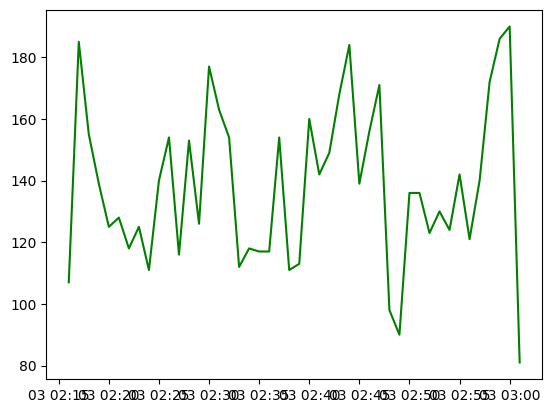

In [87]:
# get per min buckets and populate the ideal average concurrency in that list using the map_at_to_ideal_avg_conc
def get_per_min_buckets(map_at_to_ideal_avg_conc):
    per_min_buckets = {}
    for ts, conc_type in map_at_to_ideal_avg_conc.items():
        min_ts = ts.replace(second=0, microsecond=0)
        print(f"{min_ts} {conc_type}")
        if min_ts in per_min_buckets:
            if conc_type[1] == 's':
                per_min_buckets[min_ts] += 1
            # per_min_buckets[min_ts] = max(per_min_buckets[min_ts], conc_type[0])
            # per_min_buckets[min_ts] += conc_type[0]
        else:
            if conc_type[1] == 's':
                per_min_buckets[min_ts] = 1
    print(per_min_buckets)
    return per_min_buckets
per_min_buckets = get_per_min_buckets(map_at_to_ideal_avg_conc)
plt.plot(per_min_buckets.keys(), [conc for conc in per_min_buckets.values()], color='green')
# plt.plot(map_at_to_ideal_avg_conc.keys(), [conc[0] for conc in map_at_to_ideal_avg_conc.values()], color='green')

In [25]:
alloc_util_df = pd.read_pickle("../output/alloc_util/femux_default_10_min_ka_per_app_alloc_util.pickle")
alloc_util_df

,APP_NAME,MEM_ALLOC,MEM_UTIL
0,application-e3327d8e,1.059578e+07,1.958386e+05
1,application-b3c0382a,1.075406e+07,5.708219e+03
2,application-ffd7cf63,2.162316e+07,1.874118e+06
3,application-db200d5d,8.512478e+06,6.741086e+03
4,application-e249fc46,8.928245e+06,2.282891e+04
...,...,...,...
89,application-dbe31436,2.333491e+06,8.613073e+03
90,application-ed5eee3a,4.133902e+06,1.505115e+05
91,application-e66c770f,9.371234e+05,5.402817e+05
92,application-f3a51603,2.175891e+06,1.166224e+04


In [32]:
req_df = pd.read_pickle("../output/femux_v3_mc/request_id_start_and_end_df.pickle")
pod_df = pd.read_pickle("../output/femux_v3_mc/pod_name_start_and_end_df.pickle")
req_df[req_df["APP_NAME"] == "application-f5f79ac1"]

# req_df
# 2024-04-11 03:55:37.754
# 2024-04-12 03:55:37.062	

,REQUEST_ID,APP_NAME,POD_NAME,NODE_NAME,REQUEST_START_TIME,REQUEST_DURATION,REQUEST_RESPONSE_TYPE
213544,5ec902d6-d6d0-45e2-9c1e-ca35ea94c72d,application-f5f79ac1,application-f5f79ac1-world-deployment-d59d8c5c...,node6,2024-04-11 23:58:41.073,1210.0,SUCCESS
213555,d005219b-4466-4820-856c-cdb47c9d483d,application-f5f79ac1,application-f5f79ac1-world-deployment-d59d8c5c...,node6,2024-04-11 23:58:44.736,1.0,SUCCESS
213566,9a6d8dea-5641-4756-8702-e027283849f0,application-f5f79ac1,application-f5f79ac1-world-deployment-d59d8c5c...,node6,2024-04-11 23:58:48.489,2.0,SUCCESS
213589,b0e3dc78-31cb-4ce6-b31b-87d03a509714,application-f5f79ac1,application-f5f79ac1-world-deployment-d59d8c5c...,node6,2024-04-11 23:58:55.994,1.0,SUCCESS
213595,0988259d-791a-45ca-8d88-c87d41ae3f8a,application-f5f79ac1,application-f5f79ac1-world-deployment-d59d8c5c...,node6,2024-04-11 23:58:59.741,1.0,SUCCESS
213610,3f09ff23-a5ce-4505-8735-ae9f5aeab701,application-f5f79ac1,application-f5f79ac1-world-deployment-d59d8c5c...,node6,2024-04-11 23:59:03.489,2.0,SUCCESS
213640,a9ce3f35-4bbf-4b8f-852b-7714c059659a,application-f5f79ac1,application-f5f79ac1-world-deployment-d59d8c5c...,node6,2024-04-11 23:59:10.994,1.0,SUCCESS
213652,b067e4af-3ee9-457a-a0d7-3cc53693b5b8,application-f5f79ac1,application-f5f79ac1-world-deployment-d59d8c5c...,node6,2024-04-11 23:59:14.740,2.0,SUCCESS
213661,f6e0fda9-98ca-434b-8ea7-78eaae6ca8ba,application-f5f79ac1,application-f5f79ac1-world-deployment-d59d8c5c...,node6,2024-04-11 23:59:18.489,2.0,SUCCESS
213685,9268aa72-4672-4844-9ff9-7115d92cbeb5,application-f5f79ac1,application-f5f79ac1-world-deployment-d59d8c5c...,node6,2024-04-11 23:59:25.993,1.0,SUCCESS


In [35]:
pod_df[pod_df["POD_NAME"].str.contains("application-f5f79ac1")]

,POD_NAME,POD_START_TIME,POD_END_TIME,POD_DURATION
94,application-f5f79ac1-world-deployment-d59d8c5c...,2024-04-11 03:52:35,2024-04-11 03:53:35.053895,60053.895
12474,application-f5f79ac1-world-deployment-d59d8c5c...,2024-04-11 23:58:43,2024-04-12 00:00:34.442624,111442.624


In [36]:
qp_df = pd.read_pickle("../output/femux_v3_mc/qp_df.pickle")
qp_df[qp_df["APP_NAME"] == "application-f5f79ac1"]

,QPStartTime,QPDuration,QPEndTime,IngressStartTime,IngressDuration,APP_NAME
213333,2024-04-11 23:59:33.492556121,120,2024-04-11 23:59:33.613316106,2024-04-11T23:59:33.490Z,124,application-f5f79ac1
213337,2024-04-11 23:59:25.994997128,117,2024-04-11 23:59:26.112937786,2024-04-11T23:59:25.993Z,120,application-f5f79ac1
213340,2024-04-11 23:59:29.741202179,78,2024-04-11 23:59:29.81925255,2024-04-11T23:59:29.739Z,80,application-f5f79ac1
213375,2024-04-11 23:59:18.491312201,121,2024-04-11 23:59:18.612864387,2024-04-11T23:59:18.489Z,123,application-f5f79ac1
213399,2024-04-11 23:59:14.742059423,77,2024-04-11 23:59:14.819810474,2024-04-11T23:59:14.740Z,80,application-f5f79ac1
213413,2024-04-11 23:59:10.995383611,118,2024-04-11 23:59:11.113851511,2024-04-11T23:59:10.994Z,120,application-f5f79ac1
213435,2024-04-11 23:58:55.995856336,116,2024-04-11 23:58:56.112741552,2024-04-11T23:58:55.994Z,119,application-f5f79ac1
213438,2024-04-11 23:58:59.742345107,78,2024-04-11 23:58:59.820508839,2024-04-11T23:58:59.741Z,80,application-f5f79ac1
213450,2024-04-11 23:59:03.491167124,121,2024-04-11 23:59:03.61274623,2024-04-11T23:59:03.489Z,123,application-f5f79ac1
213459,2024-04-11 23:58:48.491144688,121,2024-04-11 23:58:48.612706994,2024-04-11T23:58:48.489Z,123,application-f5f79ac1


In [42]:
df = pd.read_pickle("../output/alloc_util_cs_23/femux_per_app_cold_starts.pickle")
df

,APP_NAME,REQUEST_COUNT,COLD_START_COUNT,FAILED_REQUEST_COUNT
0,application-b2e3bbc7,8,2,0
1,application-b3c0382a,18,1,0
2,application-b436299d,252,5,0
3,application-b49bdf98,670,25,0
4,application-b4e9f8a6,630,0,0
...,...,...,...,...
93,application-fdaf3422,4773,1,0
94,application-fdd2b7a7,629,0,0
95,application-fe48c49c,6,0,6
96,application-ff086f94,21,13,0


In [13]:
cs_df = pd.read_pickle("../output/alloc_util_cs_24/femux_per_app_cold_start.pickle")
req_df = pd.read_pickle("../output/femux_v3_mc/req_df_with_cold_or_warm.pickle")
# get total number of requests, number of failed requests and number of requests with cold starts
total_requests = len(req_df)
failed_requests = len(req_df[req_df["REQUEST_RESPONSE_TYPE"] == "SUCCESS"])
cold_starts = len(req_df[req_df["COLD_OR_WARM"] == "c"])
warm_starts = len(req_df[req_df["COLD_OR_WARM"] == "w"])
total_requests, failed_requests, cold_starts, warm_starts

actual_req_df = pd.read_pickle("../output/femux_v3_mc/actual_request_id_start_and_end_df.pickle")
# I want all requests marked as FAILED in req_df and then get the corresponding request_id and request_duration from actual_req_df
failed_req_df = req_df[req_df["REQUEST_RESPONSE_TYPE"] == "FAILED"]
failed_req_df = failed_req_df[["REQUEST_ID"]]
failed_req_df = failed_req_df.merge(actual_req_df, on="REQUEST_ID")
failed_req_df

app_df = req_df[req_df["APP_NAME"] == "application-e118e09d"]

len(app_df[app_df["REQUEST_RESPONSE_TYPE"] == "FAILED"])

# # check how many failed requests are cold starts
# len(req_df[(req_df["REQUEST_RESPONSE_TYPE"] == "FAILED") & (req_df["COLD_OR_WARM"] == "w")])

219

In [26]:
req_df = pd.read_pickle("../output/femux_v3_mc/request_id_start_and_end_df.pickle")
app_df = req_df[req_df["APP_NAME"] == "application-c9994ba8"]
app_df[app_df["REQUEST_RESPONSE_TYPE"] == "FAILED"]
# req_df[req_df["REQUEST_RESPONSE_TYPE"] == "FAILED"]

,REQUEST_ID,APP_NAME,POD_NAME,NODE_NAME,REQUEST_START_TIME,REQUEST_DURATION,REQUEST_RESPONSE_TYPE
123,81937842-b9e5-4c1f-a989-bc6d01d4abad,application-c9994ba8,application-c9994ba8-world-deployment-599ddbd5...,node2,2024-04-11 03:56:07.350,6606.0,FAILED
8923,59226a4b-195a-45d0-b27a-fbb6807fbe65,application-c9994ba8,application-c9994ba8-world-deployment-599ddbd5...,node2,2024-04-11 04:56:07.297,1652.0,FAILED
17753,f6b1cc22-9376-47a4-a9e2-35125fa2ea8c,application-c9994ba8,application-c9994ba8-world-deployment-599ddbd5...,node2,2024-04-11 05:56:07.285,1335.0,FAILED
27217,de1ab549-90ea-4f36-bb7b-91b2f77d1e0c,application-c9994ba8,application-c9994ba8-world-deployment-599ddbd5...,node2,2024-04-11 06:56:07.272,1986.0,FAILED
36555,f58440df-9ded-405c-8d72-92238f2709d2,application-c9994ba8,application-c9994ba8-world-deployment-599ddbd5...,node6,2024-04-11 07:56:07.353,4469.0,FAILED
45756,8871df2c-261c-42f0-ba34-6da82830b3c8,application-c9994ba8,application-c9994ba8-world-deployment-599ddbd5...,node7,2024-04-11 08:56:07.354,5405.0,FAILED
55291,269ac493-0463-49f9-bdb7-491b12e8c0cc,application-c9994ba8,application-c9994ba8-world-deployment-599ddbd5...,node6,2024-04-11 09:56:07.298,2581.0,FAILED
65076,75c33e2f-e44e-4d30-8ea6-8c5332321713,application-c9994ba8,application-c9994ba8-world-deployment-599ddbd5...,node9,2024-04-11 10:56:07.277,1354.0,FAILED
75892,b9e45a2c-49e4-4956-80aa-b635039d78b3,application-c9994ba8,application-c9994ba8-world-deployment-599ddbd5...,node7,2024-04-11 11:56:07.260,974.0,FAILED
87720,102f4bc4-d7f4-48ae-af4b-f3b2fa0e8fdf,application-c9994ba8,application-c9994ba8-world-deployment-599ddbd5...,node6,2024-04-11 12:56:07.290,1280.0,FAILED
